# 2. Data Cleaning and EDA

## Overview
---
This section will be cleaning and exploring the data from the raw datasets scraped from two subreddits. <br/>
>#### r/TheOnion & r/worldnews
Exported data: modelling_dataset.csv

## Table of Contents <a class="anchor" id="toc"></a>
---

* [Overview](#overview)
* [Importing Libraries](#importinglibraries)
* [Creating Custom Functions](#customfunctions)
* [Data Cleaning](#datacleaning)
* [EDA](#eda)
    * [r/TheOnion](#theonion)
    * [r/worldnews](#worldnews)
* [Conclusions from EDA](#conclusions)
* [Export Dataset for Modelling](#exportcsv)

## Importing Libraries <a class="anchor" id="importinglibraries"></a>
---
[Back to top!](#toc)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re

## Custom Functions <a class="anchor" id="customfunctions"></a>
---
[Back to top!](#toc)

In [2]:
def drop_over_18(df):
    '''Inputs DataFrame to drop subreddit posts indicated as NSFW (where 'over_18' is True)
       Outputs DataFrame with all subreddit posts SFW.'''
    df.drop(df[df['over_18'] == True].index, inplace=True)
    return df.over_18.value_counts()

In [3]:
def get_top_words(df, top_num):
    '''Input: dataframe to get word occurrence, top number of occurrence
       Output: dataframe with only top occurring words'''
    df = pd.DataFrame(df.sum().sort_values(ascending=False).head(top_num))
    df = df.reset_index()
    df.columns = ['words', 'counts']
    return df

In [4]:
def barplot_words(df, title, word_type):
    '''Input: Dataframe, Title of barplot, type of word
       Output: barplot of top occurring word type'''
    plt.figure(figsize=(12,8))
    plt.title(title, fontsize = 20)
    sns.set_style('whitegrid')
    sns.barplot(data = df, x ='counts', y = 'words', orient = 'h')
    plt.xlabel('Counts', fontsize = 15)
    plt.ylabel(word_type, fontsize = 15)
    plt.tick_params(labelsize = 12)

## Data Cleaning <a class="anchor" id="datacleaning"></a>
---
[Back to top!](#toc)

In [5]:
# cleaning datasets
# to remove index containing removed_by, removed_by_category
# to remove over_18

In [6]:
df_theonion, df_worldnews = pd.read_csv('../data/theonion_dataset.csv'), pd.read_csv('../data/worldnews_dataset.csv')

In [7]:
df_theonion.head()

,Unnamed: 0,Unnamed: 0.1,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media,media_embed,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,removed_by_category,gallery_data,is_gallery,media_metadata,author_cakeday,crosspost_parent,crosspost_parent_list,author_flair_background_color,author_flair_text_color,steward_reports,removed_by,updated_utc,og_description,og_title
0,0,0,[],False,nipoxa4654,NaN,[],NaN,text,t2_9oonbjf4,False,False,[],False,False,1618603680,youtu.be,https://www.reddit.com/r/TheOnion/comments/msb...,{},msbcc7,True,False,False,False,True,False,False,NaN,[],dark,text,False,"{'oembed': {'author_name': 'The Onion', 'autho...","{'content': '&lt;iframe width=""267"" height=""20...",False,False,1,0,False,all_ads,/r/TheOnion/comments/msbcc7/representative_wan...,False,rich:video,"{'enabled': False, 'images': [{'id': 'AUJX28Cl...",6,1618603690,1,"{'oembed': {'author_name': 'The Onion', 'autho...","{'content': '&lt;iframe width=""267"" height=""20...",NaN,True,False,False,TheOnion,t5_2qhmj,160538,public,https://a.thumbs.redditmedia.com/_zPQiD4RKFj37...,105.0,140.0,Representative Wants To Meet More Kids Online,0,[],1.0,https://youtu.be/ocK7rZJ6U5w,https://youtu.be/ocK7rZJ6U5w,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,[],False,pi3141592653589,NaN,[],NaN,text,t2_gi7mk,False,True,[],False,False,1618594518,theonion.com,https://www.reddit.com/r/TheOnion/comments/ms8...,{},ms8987,True,False,False,False,True,False,False,NaN,[],dark,text,False,NaN,NaN,False,True,1,0,False,all_ads,/r/TheOnion/comments/ms8987/minnesota_deploys_...,False,link,"{'enabled': False, 'images': [{'id': 'yRgy76Gr...",6,1618594528,1,NaN,NaN,NaN,True,False,False,TheOnion,t5_2qhmj,160536,public,https://b.thumbs.redditmedia.com/BQr5StDDmJxnu...,78.0,140.0,Minnesota Deploys National Guard Ahead Of Next...,0,[],1.0,https://www.theonion.com/minnesota-deploys-nat...,https://www.theonion.com/minnesota-deploys-nat...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[],False,dwaxe,NaN,[],NaN,text,t2_3jamc,False,True,[],False,False,1618588625,ogn.theonion.com,https://www.reddit.com/r/TheOnion/comments/ms6...,{},ms65tm,True,False,False,False,True,False,False,NaN,[],dark,text,False,NaN,NaN,False,True,7,0,False,all_ads,/r/TheOnion/comments/ms65tm/small_kindnesses_g...,False,link,"{'enabled': False, 'images': [{'id': 'hX5khf7c...",6,1618588636,1,NaN,NaN,NaN,False,False,False,TheOnion,t5_2qhmj,160531,public,https://b.thumbs.redditmedia.com/jP-PZIfVhdohx...,78.0,140.0,Small Kindnesses: Gamer Shields Ailing Grandmo...,0,[],1.0,https://ogn.theonion.com/small-kindnesses-game...,https://ogn.theonion.com/small-kindnesses-game...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,[],False,FutureOmelet,NaN,[],NaN,text,t2_f4n4p,False,True,[],False,False,1618584339,sports.theonion.com,https://www.reddit.com/r/TheOnion/comments/ms4...,{},ms4o4o,True,False,False,False,True,False,False,NaN,[],dark,text,False,NaN,NaN,False,True,0,0,False,all_ads,/r/TheOnion/comments/ms4o4o/report_san_diegans...,False,link,"{'enabled': False, 'images': [{'id': 'Gs3bGIXB...",6,1618584350,1,NaN,NaN,NaN,True,False,False,TheOnion,t5_2qhmj,160530,public,https://a.thumbs.redditmedia.c

In [8]:
df_theonion.shape

(2356, 82)

In [9]:
df_theonion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2356 non-null   int64  
 1   Unnamed: 0.1                   2356 non-null   int64  
 2   all_awardings                  2356 non-null   object 
 3   allow_live_comments            2356 non-null   bool   
 4   author                         2356 non-null   object 
 5   author_flair_css_class         0 non-null      float64
 6   author_flair_richtext          2354 non-null   object 
 7   author_flair_text              0 non-null      float64
 8   author_flair_type              2354 non-null   object 
 9   author_fullname                2354 non-null   object 
 10  author_patreon_flair           2354 non-null   object 
 11  author_premium                 2053 non-null   object 
 12  awarders                       2356 non-null   o

In [10]:
# checking for posts removed by reddit
df_theonion.removed_by.value_counts()

moderator    10
deleted       1
Name: removed_by, dtype: int64

In [11]:
# posts removed from subreddit will be dropped from dataset
df_theonion = df_theonion[df_theonion['removed_by'].isnull() == True]

In [12]:
df_worldnews.shape

(1899, 76)

In [13]:
df_worldnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1899 non-null   int64  
 1   Unnamed: 0.1                   1899 non-null   int64  
 2   all_awardings                  1899 non-null   object 
 3   allow_live_comments            1899 non-null   bool   
 4   author                         1899 non-null   object 
 5   author_flair_css_class         0 non-null      float64
 6   author_flair_richtext          1894 non-null   object 
 7   author_flair_text              0 non-null      float64
 8   author_flair_type              1894 non-null   object 
 9   author_fullname                1894 non-null   object 
 10  author_patreon_flair           1894 non-null   object 
 11  author_premium                 1894 non-null   object 
 12  awarders                       1899 non-null   o

In [14]:
# checking for posts removed by reddit
df_worldnews.removed_by_category.value_counts()

reddit              22
moderator            8
deleted              3
automod_filtered     1
Name: removed_by_category, dtype: int64

In [15]:
# posts removed from subreddit will be dropped from dataset
df_worldnews = df_worldnews[df_worldnews['removed_by_category'].isnull() == True]

In [16]:
# checking for NSFW posts in r/TheOnion
df_theonion.over_18.value_counts()

False    2341
True        4
Name: over_18, dtype: int64

In [17]:
# checking for NSFW posts in r/worldnews
df_worldnews.over_18.value_counts()

False    1863
True        2
Name: over_18, dtype: int64

In [18]:
# dropping all NSFW posts using custom function
drop_over_18(df_theonion)
drop_over_18(df_worldnews)

False    1863
Name: over_18, dtype: int64

In [19]:
# extracting useful features for EDA
theonion = df_theonion[['title', 'subreddit', 'author', 'num_comments', 'num_crossposts', 'upvote_ratio']]
theonion.head()

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio
0,Representative Wants To Meet More Kids Online,TheOnion,nipoxa4654,1,0,1.0
1,Minnesota Deploys National Guard Ahead Of Next...,TheOnion,pi3141592653589,1,0,1.0
2,Small Kindnesses: Gamer Shields Ailing Grandmo...,TheOnion,dwaxe,7,0,1.0
3,Report: San Diegans Just Assumed Padres Were I...,TheOnion,FutureOmelet,0,0,1.0
4,Colorado Temporarily Re-Bans Marijuana For Sta...,TheOnion,mothershipq,4,0,1.0


In [20]:
# extracting useful features for EDA
worldnews = df_worldnews[['title', 'subreddit', 'author', 'num_comments', 'num_crossposts', 'upvote_ratio']]
worldnews.head()

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio
0,Covid: Canada sounds the alarm as cases overta...,worldnews,lurker_bee,71,0,1.0
1,Navalny Ally Jailed 2 Years for Anti-Governmen...,worldnews,Seek_Adventure,0,0,1.0
2,Raul Castro steps down as Cuban Communist Part...,worldnews,pi3141592653589,3,0,1.0
3,Israeli Troops Shot and Killed a Palestinian F...,worldnews,avp1982,22,0,1.0
4,Covid-19 is predominantly transmitted through ...,worldnews,neerajanchan,2,0,1.0


## 3. EDA <a class="anchor" id="eda"></a>
---
[Back to top!](#toc) <br/>
<br/>
Using the cleaned dataframes, the summary of data explorations that are done on both subreddits are:-
* Creating new features `word_count` and `char_count` 
* Checking the mean values of `num_comments`, `num_crossposts`, `upvote_ratio`,  `word_count` and `char_count` 
* Plotting the highest occurring unigrams, bigrams and trigrams on a barplot
* From the barplots, determine additional stop words to be used

#### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|title|object|theonion_dataset.csv|Title of post|
|author|object|theonion_dataset.csv|Username of redditor that created the post|
|num_comments|int|theonion_dataset.csv|Number of comments on post|
|num_crossposts|int|theonion_dataset.csv|Number of times the post has been posted to other subreddits|
|upvote_ratio|float|theonion_dataset.csv|Proportion of upvotes to downvotes|
|word_count|int|theonion_dataset.csv|Number of words in title of post|
|char_count|int|theonion_dataset.csv|Number of characters in title of post|
|title|object|worldnews_dataset.csv|Title of post|
|author|object|worldnews_dataset.csv|Username of redditor that created the post|
|num_comments|int|worldnews_dataset.csv|Number of comments on post|
|num_crossposts|int|worldnews_dataset.csv|Number of times the post has been posted to other subreddits|
|upvote_ratio|float|worldnews_dataset.csv|Proportion of upvotes to downvotes|
|word_count|int|worldnews_dataset.csv|Number of words in title of post|
|char_count|int|worldnews_dataset.csv|Number of characters in title of post|

### r/TheOnion <a class="anchor" id="theonion"></a>
[Back to top!](#toc)

In [21]:
theonion.shape

(2341, 6)

In [22]:
theonion.head()

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio
0,Representative Wants To Meet More Kids Online,TheOnion,nipoxa4654,1,0,1.0
1,Minnesota Deploys National Guard Ahead Of Next...,TheOnion,pi3141592653589,1,0,1.0
2,Small Kindnesses: Gamer Shields Ailing Grandmo...,TheOnion,dwaxe,7,0,1.0
3,Report: San Diegans Just Assumed Padres Were I...,TheOnion,FutureOmelet,0,0,1.0
4,Colorado Temporarily Re-Bans Marijuana For Sta...,TheOnion,mothershipq,4,0,1.0


In [23]:
theonion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2341 non-null   object 
 1   subreddit       2341 non-null   object 
 2   author          2341 non-null   object 
 3   num_comments    2341 non-null   int64  
 4   num_crossposts  2341 non-null   int64  
 5   upvote_ratio    1257 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 128.0+ KB


In [24]:
# add word count feature
theonion['word_count'] = theonion['title'].str.count(' ') + 1

# add character count feature
theonion['char_count'] = theonion['title'].str.len()

theonion.head()

<ipython-input-24-86069a4491af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theonion['word_count'] = theonion['title'].str.count(' ') + 1
<ipython-input-24-86069a4491af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theonion['char_count'] = theonion['title'].str.len()


,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
0,Representative Wants To Meet More Kids Online,TheOnion,nipoxa4654,1,0,1.0,7,45
1,Minnesota Deploys National Guard Ahead Of Next...,TheOnion,pi3141592653589,1,0,1.0,10,69
2,Small Kindnesses: Gamer Shields Ailing Grandmo...,TheOnion,dwaxe,7,0,1.0,19,125
3,Report: San Diegans Just Assumed Padres Were I...,TheOnion,FutureOmelet,0,0,1.0,12,67
4,Colorado Temporarily Re-Bans Marijuana For Sta...,TheOnion,mothershipq,4,0,1.0,8,68


In [25]:
theonion.mean()

num_comments       5.917984
num_crossposts     0.006408
upvote_ratio       0.982959
word_count        13.242204
char_count        82.381888
dtype: float64

In [26]:
theonion[theonion['num_comments'] > 100]

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
563,White House Staff Heartbroken By Sight Of Weak...,TheOnion,Mystic-Alex,104,0,1.00,16,90
940,Joe Rogan Starting To Make A Lot Of Sense To M...,TheOnion,erstwhile99,113,0,0.98,19,85
1214,Trump Blames Nation’s Susceptibility To Corona...,TheOnion,Not_Fully_Awake,111,0,0.96,14,108
1258,Republicans Ridicule Democrats For Caring As L...,TheOnion,OhJohnNo,148,0,1.00,13,83
1365,Boris Johnson Released From Hospital After Def...,TheOnion,aresef,127,0,NaN,11,73


In [27]:
theonion[theonion['num_crossposts'] > 0]

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
104,Texas Governor Announces State’s Morgues Now A...,TheOnion,ThatsMyPhoenix,26,1,0.97,12,80
178,Paranoid Janet Yellen Hides Entire U.S. Money ...,TheOnion,dwaxe,12,1,0.99,13,88
352,"Pop Star's Single, 'Booty Wave', Most Likely C...",TheOnion,aresef,14,1,0.95,9,68
922,Man Driving While Making YouTube Video To Expl...,TheOnion,aresef,29,1,0.98,13,83
1052,Tampa Bay Gay Prostitutes Gearing Up For Flood...,TheOnion,spawnofdexter,13,1,0.98,11,70
1057,Health Experts Warn Protests Could Set Off Sec...,TheOnion,dwaxe,31,1,0.98,12,74
1061,37 year-old worried he might have missed the b...,TheOnion,Ghost-of-Moravia,10,2,0.99,14,77
1067,‘Banjo-Kazooie’ Fans Will Love This: This Man ...,TheOnion,aresef,14,2,0.99,13,74
1071,Panicked White Woman Calls Police On Statue Of...,TheOnion,dwaxe,44,1,0.97,12,69
1130,"Insecure, Frustrated Bully With Something To P...",TheOnion,ThatsMyPhoenix,49,1,0.97,12,88


In [28]:
# enthusiastic redditor of r/TheOnion based on posts with higher no. of comments and crossposts
theonion[theonion['author'] == 'aresef']

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
6,‘You’ve Been Cited For Drinking Adrenochrome A...,TheOnion,aresef,0,0,1.0,16,124
14,"Panthers Adopt Patchy-Haired, Shivering Rescue...",TheOnion,aresef,0,0,1.0,12,80
31,Christ Returns to NBA,TheOnion,aresef,11,0,1.0,4,21
35,Matt Gaetz Claims Sex Trafficking Allegations ...,TheOnion,aresef,6,0,1.0,15,104
48,Secret Service Worry Major Biden’s Behavior In...,TheOnion,aresef,0,0,1.0,14,92
...,...,...,...,...,...,...,...,...
2347,Trump Furiously Searching Raytheon Catalog For...,TheOnion,aresef,0,0,NaN,17,118
2348,Nation Ashamed To Admit They Would Probably Lo...,TheOnion,aresef,4,0,NaN,15,87
2350,"Giuliani: ‘When The Going Gets Tough, I Can Al...",TheOnion,aresef,0,0,NaN,17,90
2354,Kamala Harris Undergoes Heart Surgery After Se...,TheOnion,aresef,4,0,NaN,11,81


In [29]:
# enthusiastic redditor of r/TheOnion based on posts with higher no. of comments and crossposts
theonion[theonion['author'] == 'dwaxe']

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
2,Small Kindnesses: Gamer Shields Ailing Grandmo...,TheOnion,dwaxe,7,0,1.0,19,125
8,Artist Profile: Lil Nas X,TheOnion,dwaxe,0,0,1.0,5,25
16,Relief: ‘Monster Hunter Rise’ Includes A Dossi...,TheOnion,dwaxe,11,0,1.0,21,128
23,GOP Oppose Infrastructure Bill With Uplifting ...,TheOnion,dwaxe,0,0,1.0,15,89
24,Tough: The New TMNT Game Follows A European Tr...,TheOnion,dwaxe,8,0,1.0,25,157
...,...,...,...,...,...,...,...,...
2337,Jeopardizing The Deal: This Man Keeps Excusing...,TheOnion,dwaxe,1,0,NaN,26,154
2339,Ditch The Personal Trainer: 5 Pretty Bad Stret...,TheOnion,dwaxe,0,0,NaN,13,69
2340,Heartwarming: Lionel Richie And Chewbacca Mom ...,TheOnion,dwaxe,0,0,NaN,22,135
2351,Incredible Devotion: This Tibetan Monk Remembe...,TheOnion,dwaxe,1,0,NaN,16,94


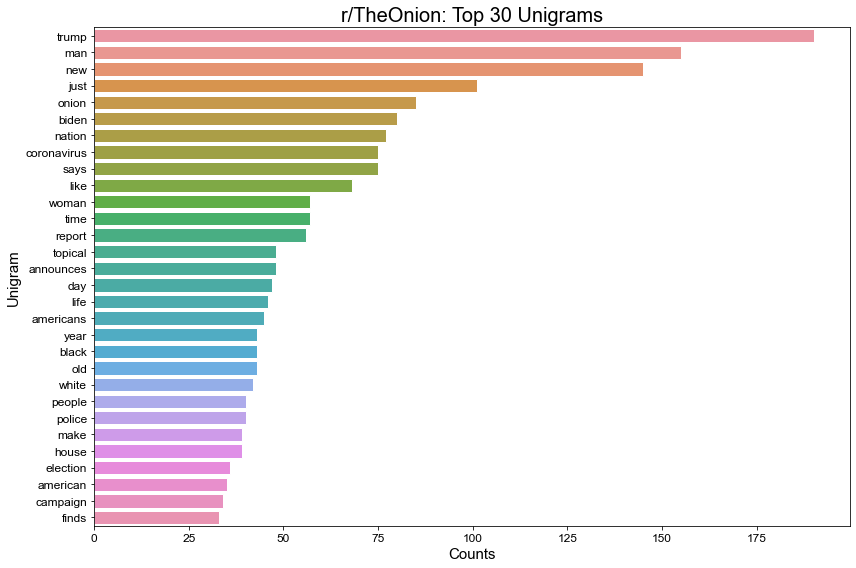

In [30]:
# selecting only the title
theonion_title = theonion['title']

# Instantiate a CountVectorizer with the chosen hyperparameters.
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

# fitting the CountVectorizer
cvec.fit(theonion_title)
theonion_title = cvec.transform(theonion_title)

# convert training data to dataframe
theonion_unigram = pd.DataFrame(theonion_title.toarray(), 
                          columns=cvec.get_feature_names())

# df of top occurring words
theonion_unigram_top = get_top_words(theonion_unigram, 30)

# get barplot of top occurring words
barplot_words(theonion_unigram_top, 'r/TheOnion: Top 30 Unigrams', 'Unigram')
plt.tight_layout()
plt.savefig('../images/thonion_top_unigrams.png', dpi = 150)

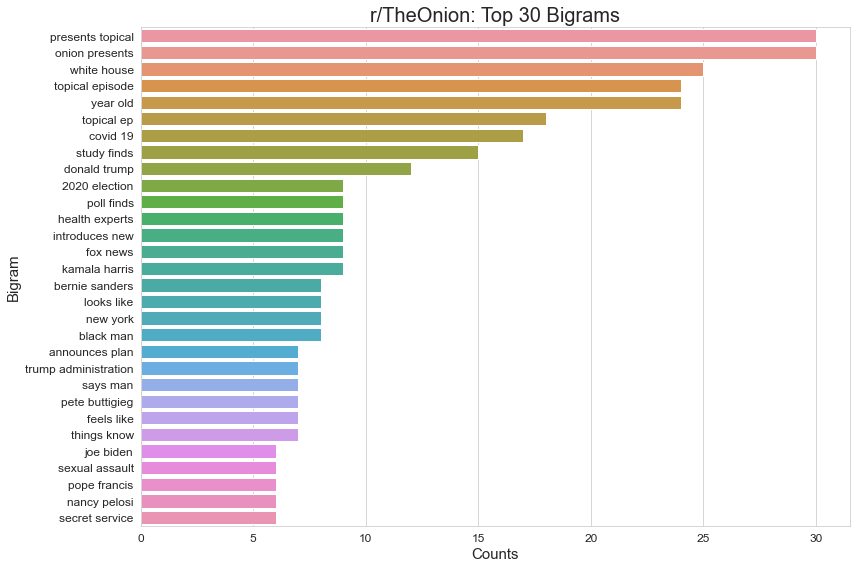

In [31]:
# selecting only the title
theonion_title = theonion['title']

# Instantiate a CountVectorizer with the chosen hyperparameters.
cvec = CountVectorizer(stop_words='english', ngram_range = (2,2))

# fitting the CountVectorizer
cvec.fit(theonion_title)
theonion_title = cvec.transform(theonion_title)

# convert training data to dataframe
theonion_bigram = pd.DataFrame(theonion_title.toarray(), 
                          columns=cvec.get_feature_names())

# df of top occurring words
theonion_bigram_top = get_top_words(theonion_bigram, 30)

# get barplot of top occurring words
barplot_words(theonion_bigram_top, 'r/TheOnion: Top 30 Bigrams', 'Bigram')
plt.tight_layout()
plt.savefig('../images/thonion_top_bigrams.png', dpi = 150)

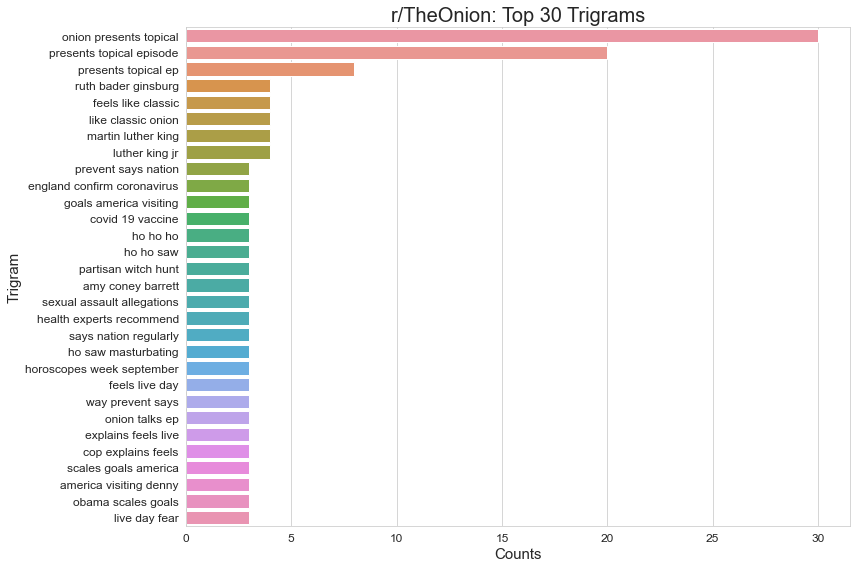

In [32]:
# selecting only the title
theonion_title = theonion['title']

# Instantiate a CountVectorizer with the chosen hyperparameters.
cvec = CountVectorizer(stop_words=('english'), ngram_range = (3,3))

# fitting the CountVectorizer
cvec.fit(theonion_title)
theonion_title = cvec.transform(theonion_title)

# convert training data to dataframe
theonion_trigram = pd.DataFrame(theonion_title.toarray(), 
                          columns=cvec.get_feature_names())

# df of top occurring words
theonion_trigram_top = get_top_words(theonion_trigram, 30)

# get barplot of top occurring words
barplot_words(theonion_trigram_top, 'r/TheOnion: Top 30 Trigrams', 'Trigram')
plt.tight_layout()
plt.savefig('../images/thonion_top_trigrams.png', dpi = 150)

Looking at the top occurring words in r/TheOnion from the barplot, additional words can be added to list of stop words such as:-
* onion 
* topical
* ho

Those words should be added to the stop word list to allow the classification models to generalize to unseen data better. 'onion' will indicate that the post is from r/TheOnion as it is the name of their news company. 'topical' is a podcast from The Onion, and should be removed from the dataset too. 'ho' simply has not much meaning to it, and can be removed too. 

### r/worldnews <a class="anchor" id="worldnews"></a>
[Back to top!](#toc)

In [33]:
# add word count feature
worldnews['word_count'] = worldnews['title'].str.count(' ') + 1

# add character count feature
worldnews['char_count'] = worldnews['title'].str.len()

worldnews.head()

<ipython-input-33-032ca2da31b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldnews['word_count'] = worldnews['title'].str.count(' ') + 1
<ipython-input-33-032ca2da31b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldnews['char_count'] = worldnews['title'].str.len()


,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
0,Covid: Canada sounds the alarm as cases overta...,worldnews,lurker_bee,71,0,1.0,9,51
1,Navalny Ally Jailed 2 Years for Anti-Governmen...,worldnews,Seek_Adventure,0,0,1.0,8,54
2,Raul Castro steps down as Cuban Communist Part...,worldnews,pi3141592653589,3,0,1.0,9,54
3,Israeli Troops Shot and Killed a Palestinian F...,worldnews,avp1982,22,0,1.0,16,92
4,Covid-19 is predominantly transmitted through ...,worldnews,neerajanchan,2,0,1.0,8,63


In [34]:
worldnews.mean()

num_comments      54.304348
num_crossposts     0.000000
upvote_ratio       0.998459
word_count        12.434246
char_count        78.907676
dtype: float64

In [35]:
worldnews[worldnews['num_comments'] > 2000]

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
90,China Backs Away as Philippines and U.S. Send ...,worldnews,Grpc96,4641,0,1.0,14,85
198,Gynecologist exiled from China says 80 sterili...,worldnews,Tolgium23,4482,0,1.0,12,79
629,'Please drink' treated Fukushima water: China ...,worldnews,honolulu_oahu_mod,5081,0,1.0,38,244
747,Ukraine warns that Russia is moving to store n...,worldnews,NA_DeltaWarDog,3470,0,1.0,12,71
972,"Putin moves 100,000 troops to border with Ukraine",worldnews,RUN_MDB,2499,0,1.0,8,49
1293,"Rolls-Royce has best quarter in 116 years, as ...",worldnews,i_love_anachronisms,3481,0,1.0,15,86
1403,"Japan Says Sorry, But It Has to Dump This Fuku...",worldnews,Dct_7,4806,0,1.0,15,85
1495,Vladimir Putin Faces Mass Russia Protest as Al...,worldnews,MariaLG1990,3849,0,1.0,13,86
1754,Two Uighur ex-government officials in China's ...,worldnews,DoremusJessup,3901,0,1.0,35,236
1840,Ghislaine Maxwell prosecution reveals nearly 3...,worldnews,MTPokitz,5891,0,1.0,10,72


In [36]:
worldnews[worldnews['num_crossposts'] > 0]

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count


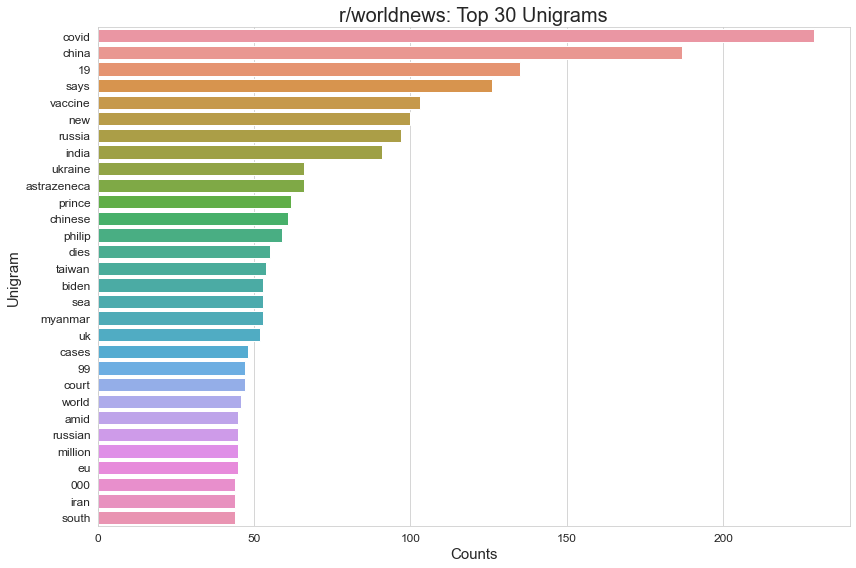

In [37]:
# selecting only the title
worldnews_title = worldnews['title']

# Instantiate a CountVectorizer with the chosen hyperparameters.
cvec = CountVectorizer(stop_words='english', ngram_range = (1,1))

# fitting the CountVectorizer
cvec.fit(worldnews_title)
worldnews_title = cvec.transform(worldnews_title)

# convert training data to dataframe
worldnews_unigram = pd.DataFrame(worldnews_title.toarray(), 
                          columns=cvec.get_feature_names())

# df of top occurring words
worldnews_unigram_top = get_top_words(worldnews_unigram, 30)

# get barplot of top occurring words
barplot_words(worldnews_unigram_top, 'r/worldnews: Top 30 Unigrams', 'Unigram')
plt.tight_layout()
plt.savefig('../images/worldnews_top_unigrams.png', dpi = 150)

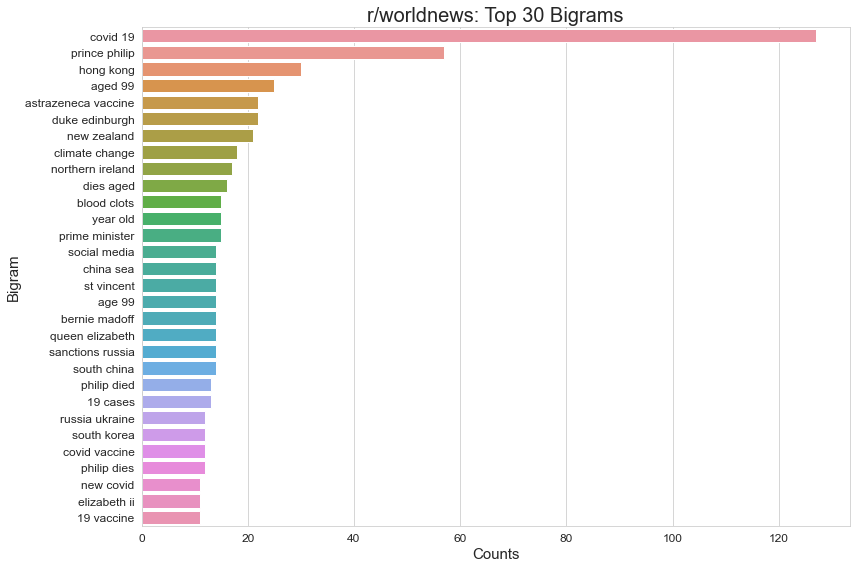

In [38]:
# selecting only the title
worldnews_title = worldnews['title']

# Instantiate a CountVectorizer with the chosen hyperparameters.
cvec = CountVectorizer(stop_words='english', ngram_range = (2,2))

# fitting the CountVectorizer
cvec.fit(worldnews_title)
worldnews_title = cvec.transform(worldnews_title)

# convert training data to dataframe
worldnews_bigram = pd.DataFrame(worldnews_title.toarray(), 
                          columns=cvec.get_feature_names())

# df of top occurring words
worldnews_bigram_top = get_top_words(worldnews_bigram, 30)

# get barplot of top occurring words
barplot_words(worldnews_bigram_top, 'r/worldnews: Top 30 Bigrams', 'Bigram')
plt.tight_layout()
plt.savefig('../images/worldnews_top_bigrams.png', dpi = 150)

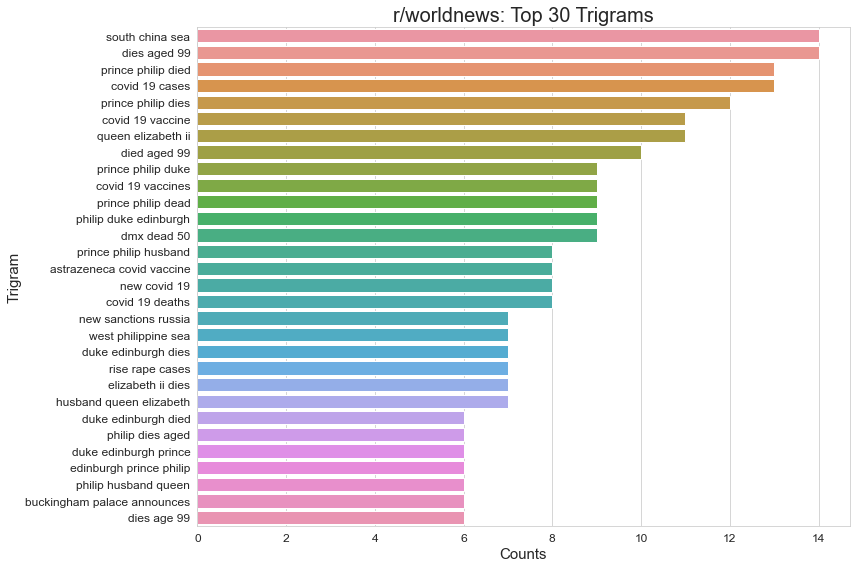

In [39]:
# selecting only the title
worldnews_title = worldnews['title']

# Instantiate a CountVectorizer with the chosen hyperparameters.
cvec = CountVectorizer(stop_words='english', ngram_range = (3,3))

# fitting the CountVectorizer
cvec.fit(worldnews_title)
worldnews_title = cvec.transform(worldnews_title)

# convert training data to dataframe
worldnews_trigram = pd.DataFrame(worldnews_title.toarray(), 
                          columns=cvec.get_feature_names())

# df of top occurring words
worldnews_trigram_top = get_top_words(worldnews_trigram, 30)

# get barplot of top occurring words
barplot_words(worldnews_trigram_top, 'r/worldnews: Top 30 Trigrams', 'Trigram')
plt.tight_layout()
plt.savefig('../images/worldnews_top_trigrams.png', dpi = 150)

## Conclusions from EDA <a class="anchor" id="conclusions"></a>
---
[Back to top!](#toc)

In [40]:
summary = [['r/TheOnion', 'r/worldnews'], 
           ['Average no. of comments', theonion.num_comments.mean(), worldnews.num_comments.mean()], 
           ['Average no. of crossposts', theonion.num_crossposts.mean(), worldnews.num_crossposts.mean()],
           ['Average upvote ratio', theonion.upvote_ratio.mean(), worldnews.upvote_ratio.mean()],
           ['Average no. of words in title of post', theonion.word_count.mean(), worldnews.word_count.mean()], 
           ['Average no. of characters in the title of post', theonion.char_count.mean(), worldnews.char_count.mean()]]

# summary table for mean values
print(tabulate(summary, 
               headers='firstrow', 
               tablefmt='fancy_grid', 
               showindex=range(1,6), 
               numalign='center'))

╒════╤════════════════════════════════════════════════╤══════════════╤═══════════════╕
│    │                                                │  r/TheOnion  │  r/worldnews  │
╞════╪════════════════════════════════════════════════╪══════════════╪═══════════════╡
│ 1  │ Average no. of comments                        │   5.91798    │    54.3043    │
├────┼────────────────────────────────────────────────┼──────────────┼───────────────┤
│ 2  │ Average no. of crossposts                      │  0.00640752  │       0       │
├────┼────────────────────────────────────────────────┼──────────────┼───────────────┤
│ 3  │ Average upvote ratio                           │   0.982959   │   0.998459    │
├────┼────────────────────────────────────────────────┼──────────────┼───────────────┤
│ 4  │ Average no. of words in title of post          │   13.2422    │    12.4342    │
├────┼────────────────────────────────────────────────┼──────────────┼───────────────┤
│ 5  │ Average no. of characters in the tit

#### General Observations from EDA
* The average number of comments on a post in r/TheOnion is only 6 as compared to 54 in r/worldnews. This is definitely due to r/worldnews having a greater following of 26.2 million compared the r/TheOnion which has only 160k members, and thus exposure on reddit. If we were to normalize those values, posts in r/TheOnion actually has a higher comment rate than that of r/worldnews
* The number of crossposts in r/TheOnion is higher than that of r/worldnews. This could be due to a smaller following of r/TheOnion, and hence the higher tendency to crosspost from r/TheOnion instead.
* The average number of words and character in the title of post is higher in r/TheOnion. This could mean that title of posts in r/worldnews are shorter and more succinct (or misleading by truncation) to capture the attention of the audience. 

## Export Dataset for Modelling <a class="anchor" id="exportcsv"></a>
---
[Back to top!](#toc) <br/>
<br/>
As the classification model will be trained based on only the title of the subreddit post, only `title` and `subreddit` (y-target) will be retained for the modelling dataset.

In [41]:
theonion_modelling = theonion[['title', 'subreddit']]
theonion.head()

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
0,Representative Wants To Meet More Kids Online,TheOnion,nipoxa4654,1,0,1.0,7,45
1,Minnesota Deploys National Guard Ahead Of Next...,TheOnion,pi3141592653589,1,0,1.0,10,69
2,Small Kindnesses: Gamer Shields Ailing Grandmo...,TheOnion,dwaxe,7,0,1.0,19,125
3,Report: San Diegans Just Assumed Padres Were I...,TheOnion,FutureOmelet,0,0,1.0,12,67
4,Colorado Temporarily Re-Bans Marijuana For Sta...,TheOnion,mothershipq,4,0,1.0,8,68


In [42]:
worldnews_modelling = worldnews[['title', 'subreddit']]
worldnews.head()

,title,subreddit,author,num_comments,num_crossposts,upvote_ratio,word_count,char_count
0,Covid: Canada sounds the alarm as cases overta...,worldnews,lurker_bee,71,0,1.0,9,51
1,Navalny Ally Jailed 2 Years for Anti-Governmen...,worldnews,Seek_Adventure,0,0,1.0,8,54
2,Raul Castro steps down as Cuban Communist Part...,worldnews,pi3141592653589,3,0,1.0,9,54
3,Israeli Troops Shot and Killed a Palestinian F...,worldnews,avp1982,22,0,1.0,16,92
4,Covid-19 is predominantly transmitted through ...,worldnews,neerajanchan,2,0,1.0,8,63


In [43]:
df = pd.concat([theonion_modelling, worldnews_modelling])
df.shape

(4204, 2)

In [44]:
df.head()

,title,subreddit
0,Representative Wants To Meet More Kids Online,TheOnion
1,Minnesota Deploys National Guard Ahead Of Next...,TheOnion
2,Small Kindnesses: Gamer Shields Ailing Grandmo...,TheOnion
3,Report: San Diegans Just Assumed Padres Were I...,TheOnion
4,Colorado Temporarily Re-Bans Marijuana For Sta...,TheOnion


In [45]:
df.tail()

,title,subreddit
1893,"Tim Hortons, Metro among retailers in new repo...",worldnews
1894,Covid Philippines: Man dies after being forced...,worldnews
1895,Lightning strikes will more than double in Arc...,worldnews
1896,"As it battles its worst drought in 56 years, T...",worldnews
1897,Iran indicts 10 officials over shootdown of Uk...,worldnews


In [46]:
df.to_csv('../data/modelling_dataset.csv', index=False)